## Multidimensional data

Part of **Working with data**

The books starts with a **correlation matrix**. Then it visualises the data with a **scatterplot matrix**.

In [ ]:
from typing import List
from scratch.working_with_data import random_normal
import random

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)

# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]
corr_rows

[[1.0127925872802734, -4.364223480224609, -4.353599548339844, 0],
 [-0.6466960906982422, 3.261737823486328, 1.4120292663574219, 6],
 [0.7850933074951172, -4.440364837646484, -3.9487648010253906, 0],
 [0.21056175231933594, 0.2764129638671875, 0.5456733703613281, 6],
 [-0.5773830413818359, 3.5797882080078125, 4.508399963378906, 6],
 [-0.6729030609130859, 4.703712463378906, 14.605865478515625, 6],
 [0.8787059783935547, -3.099536895751953, -4.6979522705078125, 0],
 [0.6123065948486328, -1.7865753173828125, 1.2200736999511719, 6],
 [-0.06987571716308594, -0.928192138671875, -1.8268585205078125, 6],
 [0.2816295623779297, -0.048618316650390625, 9.398536682128906, 6],
 [-0.05766868591308594, 1.3928413391113281, -1.8739891052246094, 6],
 [0.8597087860107422, -4.176158905029297, -14.297008514404297, 0],
 [0.5819606781005859, -3.16619873046875, 2.0856666564941406, 6],
 [0.4348278045654297, -5.224494934082031, -4.870204925537109, 0],
 [1.115121841430664, -6.269378662109375, -7.420234680175781, 0],

In [ ]:
# so this is a list per column
corr_data = [list(col) for col in zip(*corr_rows)]
corr_data

[[1.0127925872802734,
  -0.6466960906982422,
  0.7850933074951172,
  0.21056175231933594,
  -0.5773830413818359,
  -0.6729030609130859,
  0.8787059783935547,
  0.6123065948486328,
  -0.06987571716308594,
  0.2816295623779297,
  -0.05766868591308594,
  0.8597087860107422,
  0.5819606781005859,
  0.4348278045654297,
  1.115121841430664,
  1.1286258697509766,
  -0.7107639312744141,
  -0.1307964324951172,
  0.019903182983398438,
  0.12887001037597656,
  0.8944797515869141,
  0.26160240173339844,
  0.24374961853027344,
  -0.5524158477783203,
  0.28655052185058594,
  -1.3418292999267578,
  1.4281940460205078,
  1.4261150360107422,
  0.5396556854248047,
  1.034231185913086,
  1.6425800323486328,
  0.41314125061035156,
  0.8180141448974609,
  -0.03397941589355469,
  -0.6965732574462891,
  -0.7706356048583984,
  0.8998966217041016,
  0.5177211761474609,
  1.3408565521240234,
  -1.9317150115966797,
  0.1915454864501953,
  2.064542770385742,
  1.7627811431884766,
  -0.8044147491455078,
  -1.99940

In [ ]:
# corr_data is a list of four 100-dimensional vectors
num_vectors = len(corr_data)
num_vectors

4

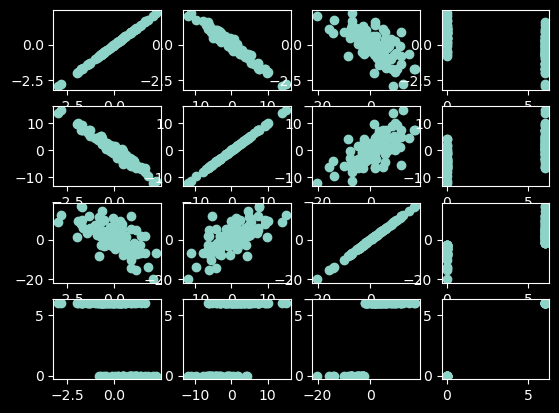

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs column_i on the y-axis,

        ax[i][j].scatter(corr_data[j], corr_data[i])

plt.show()

In [ ]:
plt.savefig('im/working_scatterplot_matrix.png')
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

# dimensionality reduction

This part is about **Principal component analysis (PCA)**. The **first principal component** of a set of points is the direction in which the points vary the most. 

Here's an explanation of the code in simple bullet points:

- `de_mean` recenters the data to have mean 0 in every dimension.
  - Calculate the mean vector of the input data.
  - Subtract the mean vector from each data point and return the resulting list.
  
  
- `direction` normalizes a vector.
  - Calculate the magnitude of the input vector.
  - Divide each element of the vector by its magnitude and return the resulting vector.


- `directional_variance` calculates the variance of data points in the direction of a given vector.
  - Normalize the input vector using the `direction` function.
  - Calculate the squared dot product between the data points and the normalized vector and return the sum.


- `directional_variance_gradient` calculates the gradient of directional variance with respect to a given vector.
  - Normalize the input vector using the `direction` function.
  - Calculate the gradient for each element of the input vector and return the resulting vector.


- `first_principal_component` finds the first principal component of the data.
  - Initialize a random guess vector.
  - Iterate for a given number of steps and update the guess vector using the `gradient_step` function.
  - Return the `direction` of the final guess vector.


- Define the `pca` function that performs principal component analysis on the input data.
  - Initialize an empty list of components.
  - Iterate for the given number of components, calculate the first principal component, and remove its projection from the data.
  - Append the first principal component to the list of components and return it.


In [ ]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

In [ ]:
from scratch.linear_algebra import subtract
from scratch.linear_algebra import Vector, vector_mean
import tqdm

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

from scratch.linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

from scratch.linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]


from scratch.gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

dv: 10279.151: 100%|██████████| 100/100 [00:00<00:00, 981.29it/s]


In [ ]:
# to remove the projection:
from scratch.linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

from scratch.linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

# to transform the data into lower-dimensional space as defined by the components
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

In [ ]:

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

de_meaned = de_mean(pca_data)

fpc = first_principal_component(de_meaned)
fpc # is the first_principal_component aka the main direction of the dataset

dv: 10279.151: 100%|██████████| 100/100 [00:00<00:00, 776.94it/s]


[0.9237307801943212, 0.3830423549969252]

In [ ]:
de_meaned

[[0.6663708720254569, 1.6869418499129445],
 [2.471684004870358, -5.088339625620957],
 [5.368403552884857, 2.805149417126744],
 [-2.2983272680740434, -3.3981692476646543],
 [1.0964334470851576, 3.9114372380290447],
 [-19.856609863952727, -4.921363369782156],
 [9.619525451082257, 0.704883018605944],
 [-1.219722455117843, 1.0118751080174437],
 [-3.831800410999044, 3.5394571654195435],
 [1.1594597070579553, 2.326746410178144],
 [-16.423753925925123, -2.7744125929223564],
 [14.271085292548257, 4.095564703470645],
 [-6.927095188358244, -1.926277580593755],
 [0.4278636510614575, 5.989093953283115],
 [4.539544674811555, 2.6766536531067437],
 [0.0016477109947565793, 1.9282437907588434],
 [1.6018359298294556, -2.521793370796555],
 [2.9282818084181557, 2.533093026944144],
 [8.274604405054657, 1.539102806903344],
 [8.995435649739658, 0.17075700094904356],
 [-5.050753983267944, -3.6642215585720557],
 [6.256418976917157, 5.602806363228984],
 [9.893116471505657, 2.1734788842515442],
 [16.526437837975

To plot this, I asked ChatGPT

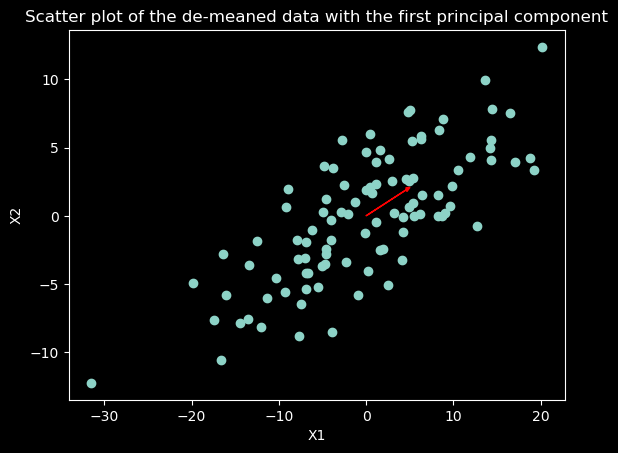

In [ ]:
# First, plot the de-meaned data points as a scatter plot
de_meaned_xs = [x[0] for x in de_meaned]
de_meaned_ys = [x[1] for x in de_meaned]
plt.scatter(de_meaned_xs, de_meaned_ys)

# Now, plot the FPC as a vector (arrow) on the scatter plot
# We'll scale the FPC so that it's easier to visualize on the plot
scaled_fpc = [fpc_i * 5 for fpc_i in fpc]  # Adjust the scaling factor as needed
plt.arrow(0, 0, scaled_fpc[0], scaled_fpc[1], color='red', width=0.01, head_width=0.3)

# Set the axis labels and the plot title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of the de-meaned data with the first principal component')

# Finally, display the plot
plt.show()

## Much easier, using sklearn's PCA function

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=1)  # We only want the first principal component
pca.fit(pca_data)

fpc_sk = pca.components_[0]
print("First Principal Component:", fpc_sk)

First Principal Component: [-0.92391028 -0.38260919]


Why negative?? 

The sign of the principal component vectors is not unique, and it can differ between different PCA implementations or even different runs of the same implementation due to the nature of the eigenvalue decomposition or singular value decomposition used internally. 

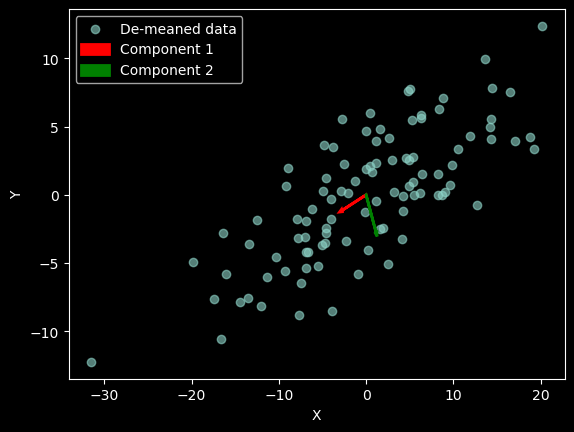

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create synthetic data
# np.random.seed(42)
# data = np.random.randn(50, 2)
data = pca_data

# De-mean the data
mean = np.mean(data, axis=0)
demeaned_data = data - mean

# Perform PCA
pca = PCA(n_components=2)
pca.fit(demeaned_data)
components = pca.components_

# Plot original de-meaned data
plt.scatter(demeaned_data[:, 0], demeaned_data[:, 1], label='De-meaned data', alpha=0.6)

# Plot PCA components as arrows
arrow_scale = 3
arrow_colors = ['red', 'green']
for i, component in enumerate(components):
    plt.arrow(0, 0, component[0] * arrow_scale, component[1] * arrow_scale, 
              head_width=0.2, head_length=0.3, linewidth=2, color=arrow_colors[i], label=f'Component {i+1}')

# Add labels, legend, and show the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
fpc_sk2 = pca.components_[0]
print("First Principal Component:", fpc_sk2)

First Principal Component: [-0.92391028 -0.38260919]


Principal Component Analysis (PCA) is a technique that can be used to reduce the dimensionality of a dataset **by creating new uncorrelated variables** that maximize the variance of the data. If your data has many covariates and there is a concern about multicollinearity (high correlation between covariates), PCA can be used to create a smaller set of uncorrelated variables. 

However, the new variables created by PCA may not have a clear or interpretable relationship with the dependent variable, which can make the results of the model harder to interpret..

Here are some other ways to deal with multicollinearity:

1. **Remove one of the variables**: If two variables are highly correlated, they are likely conveying similar information, so you might not need both. In this case, you can remove one of them.

2. **Combine the correlated variables**: If the correlated variables represent similar underlying phenomena, it might make sense to combine them into a single variable. This could be as simple as taking the average, or it could involve more complex data reduction techniques like Principal Component Analysis (PCA).

3. **Use regularization methods**: Regularization methods like Ridge Regression or Lasso can help to mitigate the impact of multicollinearity. These methods add a penalty term to the loss function during the model fitting process, which can help to prevent overfitting and reduce the impact of correlated predictors.

4. **Increase sample size**: Multicollinearity is often less of a problem with larger sample sizes. If possible, collecting more data can help.

5. **Use Partial Least Squares Regression (PLS) or Principal Component Regression (PCR)**: These methods transform the predictors to a set of uncorrelated components and then perform the regression.

Remember, it's important to understand the context and the reasons behind the multicollinearity before deciding on the best approach. Sometimes multicollinearity is a symptom of a deeper issue with the study design or data collection, and addressing these issues can help to resolve the multicollinearity.